In [1]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table, load_graph, accessURL

In [2]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [3]:
qid  = 'reasoning1'
tbox = 'http://mynotebook:8888/files/colors.owl'
frmt = 'JSON'
body =  ''' 
        SELECT (COUNT(?w) AS ?cntWarm) (COUNT(?c) AS ?cntCold) ((?cntWarm>?cntCold) as ?moreWarmThanCold)  
        FROM NAMED WINDOW <rw> ON <http://redstream:1255/red> [RANGE PT15S STEP PT5S]
        FROM NAMED WINDOW <gw> ON <http://greenstream:2255/green> [RANGE PT15S STEP PT5S]
        WHERE {
            { WINDOW ?w1 { ?w a <http://www.streamreasoning.org/ontologies/2018/9/colors#Warm>.} }
            UNION
            { WINDOW ?w2 { ?c a <http://www.streamreasoning.org/ontologies/2018/9/colors#Cold> .} }
        }
    '''

In [4]:
reasoning1q = jasper.create(qid, body, tbox, frmt)

In [5]:
jasper.streams()

[http://jasper:8181/jasper/streams/redgreen,
 http://shapestream:4000/shapes,
 http://redstream:1255/red,
 http://greenstream:2255/green,
 http://jasper:8181/jasper/streams/reasoning1,
 http://jasper:8181/jasper/streams/redcount,
 http://jasper:8181/jasper/streams/CntHouses,
 http://jasper:8181/jasper/streams/yellow,
 http://jasper:8181/jasper/streams/assemble,
 http://jasper:8181/jasper/streams/assemble]

In [6]:
r = jasper.expose(qid, 'HTTP', retention=5)

In [7]:
reasoning1_stream = reasoning1q.stream()

In [21]:
reasoning1.endpoints()

[GET http://jasper:8185/jasper/streams/reasoning1/observers/1332050328,
 GET http://jasper:8186/jasper/streams/reasoning1/observers/1955636826]

In [8]:
endpoint = reasoning1_stream.endpoints()[0]

In [9]:
endpoint.call().flatten().dataframe()

,head_vars_0,head_vars_1,head_vars_2,results_bindings_0_cntCold_datatype,results_bindings_0_cntCold_type,results_bindings_0_cntCold_value,results_bindings_0_cntWarm_datatype,results_bindings_0_cntWarm_type,results_bindings_0_cntWarm_value,results_bindings_0_moreWarmThanCold_datatype,results_bindings_0_moreWarmThanCold_type,results_bindings_0_moreWarmThanCold_value
0,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,7,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,false
1,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,8,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,false
2,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,6,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,false
3,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,8,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,false
4,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,8,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,false


In [17]:
df = endpoint.call().flatten().dataframe(['results_bindings_0_cntCold_value', 'results_bindings_0_cntWarm_value'])
df

,head_vars_0,head_vars_1,head_vars_2,results_bindings_0_cntCold_datatype,results_bindings_0_cntCold_type,results_bindings_0_cntCold_value,results_bindings_0_cntWarm_datatype,results_bindings_0_cntWarm_type,results_bindings_0_cntWarm_value,results_bindings_0_moreWarmThanCold_datatype,results_bindings_0_moreWarmThanCold_type,results_bindings_0_moreWarmThanCold_value
0,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,9,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,false
1,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,11,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,false
2,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,9,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,false
3,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,9,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,false
4,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,7,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,false


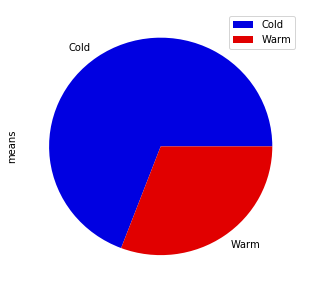

In [18]:
%matplotlib inline
import pandas as pd

df1 = df[['results_bindings_0_cntCold_value','results_bindings_0_cntWarm_value']]
cntg_mean = df1['results_bindings_0_cntCold_value'].mean()
cntr_mean = df1['results_bindings_0_cntWarm_value'].mean()

df = pd.DataFrame({'means': [cntg_mean, cntr_mean]}, index=['Cold', 'Warm'])
plot = df.plot.pie(y='means', colors=["#0000e1", "#e10000"], figsize=(5, 5))